In [1]:
#import netCDF4 as nc
import pandas as pd
#import pandasql as ps
#import xarray as xr
import matplotlib.pyplot as plt

pd.options.display.max_columns = None
pd.set_option('display.max_rows', 150)

#import descartes
import geopandas as gpd
from shapely.geometry import Point,Polygon
import numpy as np
import glob

pd.set_option('display.max_rows', 173)

shapeWorld = gpd.read_file('/Users/paolo/Documents/TC_old/data/world_shapefile/99bfd9e7-bb42-4728-87b5-07f8c8ac631c2020328-1-1vef4ev.lu5nk.shp')


In [2]:
def plot_day(data1, date, colname):    
    
    #data1 = pd.read_csv('/Users/paolo/Documents/TC_old/data/NewData_csv/test_sets_withrealtom.csv')
    
    data1 = data1.reset_index()
    
    data1 = data1.loc[:,['time','latitude','longitude','Real_tom_target',colname]]
        
    dt = date
    
    data1 = data1.loc[data1.time==dt].dropna()
    
    data1['Real_tom_target'] = data1.apply(lambda x: 1 if x.Real_tom_target>=50 else 0,axis=1)
    
    #data.to_csv('sst_trop_bidim1.csv',index=False)
    ### 2019-04-25 works well, 2019-07-15 should be 0 but predicts some higher, 2019-08-01 is correctly all 0
        
    crs = {'init' : 'EPSG:4326'}
    
    geometry_mi = [Point(xy) for xy in zip(data1['longitude'], data1['latitude'])]
    geometry_mi[:3]
    
    features_gdf1 = gpd.GeoDataFrame(data1,geometry=geometry_mi) # ,crs=crs
    
    fig,ax = plt.subplots(1,2,figsize=(30,15))
    
    shapeWorld.plot(ax=ax[0],alpha=0.4,color='grey')
    features_gdf1.plot(ax=ax[0],markersize=20,marker='o',label='lsm',column='Real_tom_target', vmin=0, vmax=1)
    ax[0].set_title('True label, '+str(dt))
    
    shapeWorld.plot(ax=ax[1],alpha=0.4,color='grey')
    
    features_gdf1.plot(ax=ax[1],markersize=20,marker='o',label='predict_prob',column=colname, vmin=0, vmax=0.3)
    
    ax[1].set_title('Predicted probability, '+str(dt))
    
    plt.show()
    

In [3]:
test_with_newTarget_predictions = pd.read_csv('test_with_newTarget_predictions.csv')
test_with_newTarget_predictions

,Unnamed: 0.1,Unnamed: 0,time,latitude,longitude,vo,r,u_200,u_850,v_200,v_850,ttr,sst,new_target,Real_tom_target,shear,target,predictions_lag0,predictions_lag1,predictions_lag2,predictions_lag3,predictions_lag4,predictions_lag5,predictions_lag6,predictions_lag7,predictions_lag8,predictions_lag9,predictions_lag10,predictions_lag11,predictions_lag12,predictions_lag13
0,34307,34307,2016-04-01,0.0,20.0,0.238973,1.386669,-0.945404,1.574206,0.511504,0.367981,2.652010,-1.588255,0.0,0.0,-0.516292,0,5.599760e-06,1.116584e-05,0.000032,0.000440,1.698381e-04,4.817998e-06,3.752636e-05,0.000202,2.247904e-05,0.000111,0.000871,3.269772e-06,0.000328,0.000142
1,34308,34308,2016-04-01,0.0,22.5,-0.172396,1.196522,-0.819827,1.371793,0.717349,0.332262,3.396515,-1.588255,0.0,0.0,-0.755886,0,8.091185e-07,3.770019e-07,0.000002,0.000008,1.457031e-06,6.148791e-08,6.037646e-07,0.000003,5.734404e-07,0.000007,0.000024,5.036778e-08,0.000031,0.000008
2,34309,34309,2016-04-01,0.0,25.0,1.188889,1.166772,-0.571398,1.173488,0.662464,0.144802,4.092788,-1.588255,0.0,0.0,-1.161314,0,5.273907e-07,1.280818e-07,0.000003,0.000005,5.989831e-07,3.379468e-08,3.775615e-07,0.000001,2.429358e-07,0.000003,0.000012,3.192573e-08,0.000018,0.000004
3,34310,34310,2016-04-01,0.0,27.5,-0.649707,1.063899,-0.385753,0.812011,0.713230,0.584284,4.044557,-1.588255,0.0,0.0,-1.507685,0,4.937469e-07,6.390888e-08,0.000009,0.000003,9.002248e-07,3.109205e-08,8.725253e-08,0.000001,1.392415e-08,0.000001,0.000008,2.136173e-08,0.000014,0.000001
4,34311,34311,2016-04-01,0.0,30.0,-0.629183,1.432846,-0.362931,0.809212,0.888739,-0.207576,3.438931,-1.588255,0.0,0.0,-1.154385,0,9.038527e-07,1.089020e-07,0.000020,0.000004,1.546370e-06,4.021748e-08,5.431863e-08,0.000002,2.086840e-08,0.000002,0.000012,2.222927e-08,0.000014,0.000002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
929677,963984,137600,2022-12-31,-30.0,80.0,0.677806,-1.271307,0.290892,-0.727302,0.813190,-0.684904,-0.431475,0.601392,0.0,0.0,0.050674,0,5.519601e-03,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000
929678,963985,137601,2022-12-31,-30.0,82.5,0.898493,-1.325164,0.224460,-0.764678,1.178495,-0.105389,-0.107881,0.599524,0.0,0.0,0.004080,0,3.107689e-03,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000
929679,963986,137602,2022-12-31,-30.0,85.0,1.629797,-1.468220,0.376651,-0.566606,1.728863,0.450626,-0.082227,0.597113,0.0,0.0,0.220205,0,1.299448e-03,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000
929680,963987,137603,2022-12-31,-30.0,87.5,0.280770,-1.453315,0.621629,-0.446284,2.368318,0.792994,-0.000815,0.594579,0.0,0.0,0.648118,0,6.500229e-04,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000


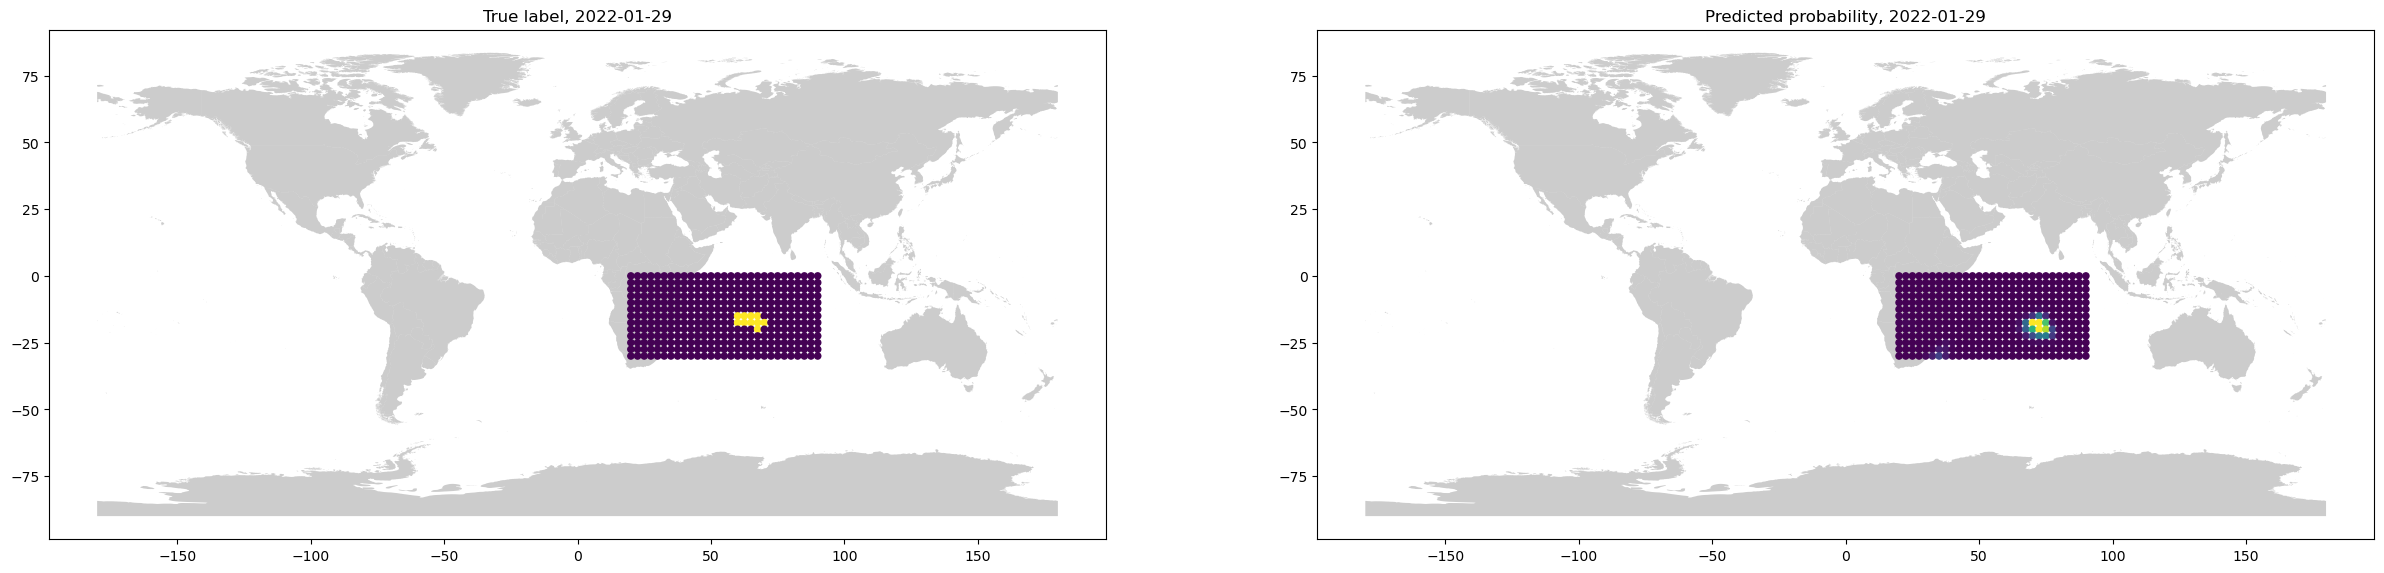

In [19]:
plot_day(test_with_newTarget_predictions, '2022-01-29', 'predictions_lag0') 